# Hypothesis Testing With Healthcare Data

The columns in the dataset are:

**sex**	The gender of the individual
**age**	The age of the individual
**week**	The week of the drug testing
**trx**	The treatment (Drug) and control (Placebo) groups
**wbc**	The count of white blood cells
**rbc**	The count of red blood cells
**adverse_effects**	The presence of at least a single adverse effect
**num_effects**	The number of adverse effects experienced by a single individual

# Goal Of The Project

Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called two_sample_p_value

Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called num_effects_p_value containing a p-value

Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called age_group_effects_p_value

In [1]:
# Importing packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# two_sample_p_value

In [2]:
# Loading the dataset
file_path = "C:\\Users\\cyuck\\Downloads\\DATA ANALYSIS\\drug_safety.csv"
drug_safety = pd.read_csv(file_path)

# Counting the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Computing total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Creating an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Creating an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Performing a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Storing the p-value
two_sample_p_value = two_sample_results[1]

print(two_sample_p_value)

0.9639333330262475


# num_effects_p_value

In [3]:
# Determining if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Extracting the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]

print(num_effects_p_value)

0.6150123339426765


C:\Users\cyuck\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\cyuck\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


# age_group_effects_p_value

Histogram and Normality test are used to choose between unpaired t-test and Wilcoxon-Mann-Whitney test

C:\Users\cyuck\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\cyuck\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False


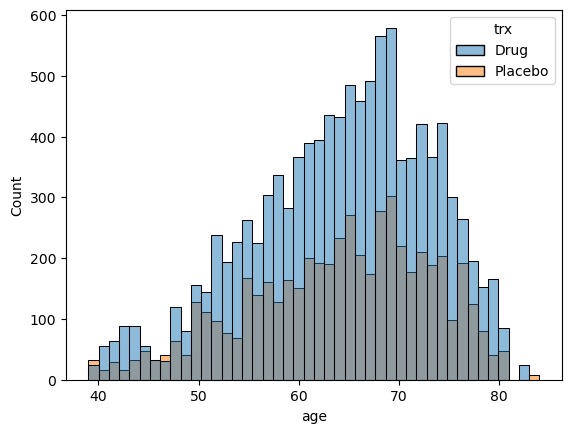

In [4]:
# histogram
sns.histplot(data=drug_safety, x="age", hue="trx")

# normality test
# To choose between unpaired t-test and Wilcoxon-Mann-Whitney test
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', 
    alpha=0.05) 
print(normality)

In [5]:
# Selecting the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Selecting the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Data distribution is not normal
# Therefore a two-sided Mann-Whitney U test is appropriate
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# Extracting the p-value
age_group_effects_p_value = age_group_effects["p-val"]

print(age_group_effects_p_value)

MWU    0.256963
Name: p-val, dtype: float64


# Conclusion

Since the p value for all three tests returned as greater than .05 (alpha value), I fail to reject all three null hypotheses. 

This means 

1. There is not enough evidence to conclude the proportion of adverse effects signifcantly differ between the Drug and Placebo groups. 
2. There is not enough evidence to conclude that the number of adverse effects is dependent on the treatment and control groups.
3. There is not enough evidence to conclude that there is a significant difference between between the ages of the Drug and Placebo groups